In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Cargamos el archivo
data_examen = pd.read_csv("peso_molecular_solubilidad.csv", sep=",")

In [101]:
#he hecho un gráfico de barras con la librería seaborn
def grafico_barras(dataframe):
    return sns.countplot(x=dataframe["solubility"])

<AxesSubplot:xlabel='solubility', ylabel='count'>

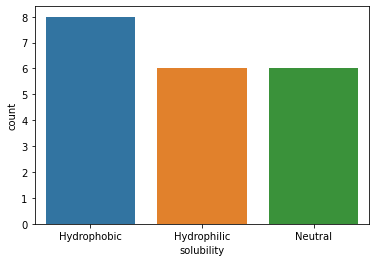

In [102]:
grafico_barras(data_examen)

In [103]:
#he hecho un gráfico pastel como hemos visto en clase con pandas y matplotlib
def grafico_pastel_solubility(dataframe):
    data_solubilidad = dataframe.groupby(['solubility'])['solubility'].count()
    return data_solubilidad.plot(kind='pie', title='Nº aminoácidos por tipo de solubilidad')

<AxesSubplot:title={'center':'Nº aminoácidos por tipo de solubilidad'}, ylabel='solubility'>

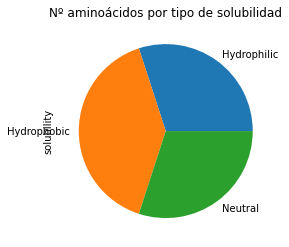

In [104]:
grafico_pastel_solubility(data_examen)

In [105]:
def aa_to_weigth(secuencia):
    suma=0
    for aminoacido in secuencia:
        #para cada aminoácido selecciono su columna de weight
        weigth = float(data_examen[data_examen["aa"] == aminoacido]["weight"])
        #y se la sumo a la cantidad anterior que se va acumulando
        suma+=weigth
    return suma

In [106]:
aa_to_weigth("MNGSPDIREGAQG")

1312.5829799999997

In [107]:
def grafico_barras_secuencia(secuencia):
    #he creado un dataframe vacio al que le voy a ir añadiendo las filas indicadas
    result = pd.DataFrame(columns=["aa", "solubility"])
    for aminoacido in secuencia:
        #para cada aminoácido selecciono su fila con las columnas que quiero
        result_aa = data_examen[data_examen["aa"] == aminoacido].filter(items=["aa", "solubility"])
        #y se lo añado al dataframe resultado
        result = result.append(result_aa)
        #después cuando ya tengo ese dataframe es cuando hago el gráfico con seaborn
    return sns.countplot(x=result["solubility"])

<AxesSubplot:xlabel='solubility', ylabel='count'>

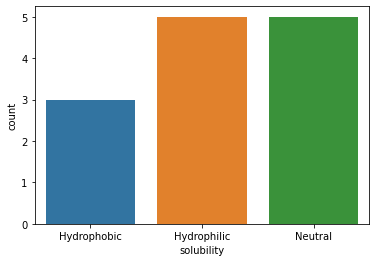

In [108]:
grafico_barras_secuencia("MNGSPDIREGAQG")